<a href="https://colab.research.google.com/github/bmcgauley/ML/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset 1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import os
import sys
import subprocess

In [2]:
# Optional imports for visualization
try:
    from sklearn.tree import export_graphviz
    import pydotplus
    from IPython.display import Image
    VISUALIZATION_AVAILABLE = True
except ImportError:
    print("Warning: Visualization libraries not available. Tree visualization will be skipped.")
    VISUALIZATION_AVAILABLE = False
# Check if Graphviz is installed and accessible
def is_graphviz_installed():
    try:
        # Try to run dot -V to check if Graphviz is installed
        subprocess.run(['dot', '-V'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
        return True
    except (subprocess.SubprocessError, FileNotFoundError):
        return False


In [3]:
# Load the dataset
print("Loading and preparing the dataset...")
df = pd.read_csv("bank.csv", sep=";")


Loading and preparing the dataset...


In [4]:
# Display basic information about the dataset
print("\nDataset Information:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")  # -1 for the target variable
print("\nFirst few rows of the dataset:")
print(df.head())



Dataset Information:
Number of records: 4521
Number of features: 16

First few rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
# Display summary statistics
print("\nSummary Statistics for Numerical Features:")
print(df.describe())



Summary Statistics for Numerical Features:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     

In [6]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())



Checking for missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Preprocess the data
print("\nPreprocessing the data...")

# Encode categorical variables
# Create a copy of the dataframe to avoid modifying the original data
df_encoded = df.copy()

# Initialize a label encoder for categorical features
label_encoder = LabelEncoder()


Preprocessing the data...


In [9]:
# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Encode each categorical column
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

print("\nAfter encoding categorical variables:")
print(df_encoded.head())



After encoding categorical variables:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  


In [10]:
# Split dataset into features and target variable
X = df_encoded.drop('y', axis=1)  # Features (all columns except 'y')
y = df_encoded['y']  # Target variable


In [11]:
# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 3164 samples
Testing set size: 1357 samples


In [12]:
# Create and train the Decision Tree classifier
print("\nTraining the Decision Tree classifier...")
# Using a moderate depth to show more decision paths but avoid overfitting
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)



Training the Decision Tree classifier...


DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
print("\nModel Evaluation:")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")



Model Evaluation:
Accuracy: 0.8909


In [14]:
# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1205
           1       0.52      0.34      0.41       152

    accuracy                           0.89      1357
   macro avg       0.72      0.65      0.67      1357
weighted avg       0.88      0.89      0.88      1357



In [15]:
# Calculate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[1158   47]
 [ 101   51]]


In [16]:
# Calculate precision, recall, and F1-score
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.5204
Recall: 0.3355
F1-Score: 0.4080


In [17]:
# Visualize feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)



Feature Importance:
      Feature  Importance
11   duration    0.510221
13      pdays    0.170407
0         age    0.107801
15   poutcome    0.094595
10      month    0.049260
3   education    0.020998
2     marital    0.016984
14   previous    0.015275
4     default    0.008859
5     balance    0.005601
1         job    0.000000
6     housing    0.000000
7        loan    0.000000
9         day    0.000000
8     contact    0.000000
12   campaign    0.000000


Feature importance chart saved as 'feature_importance.png'


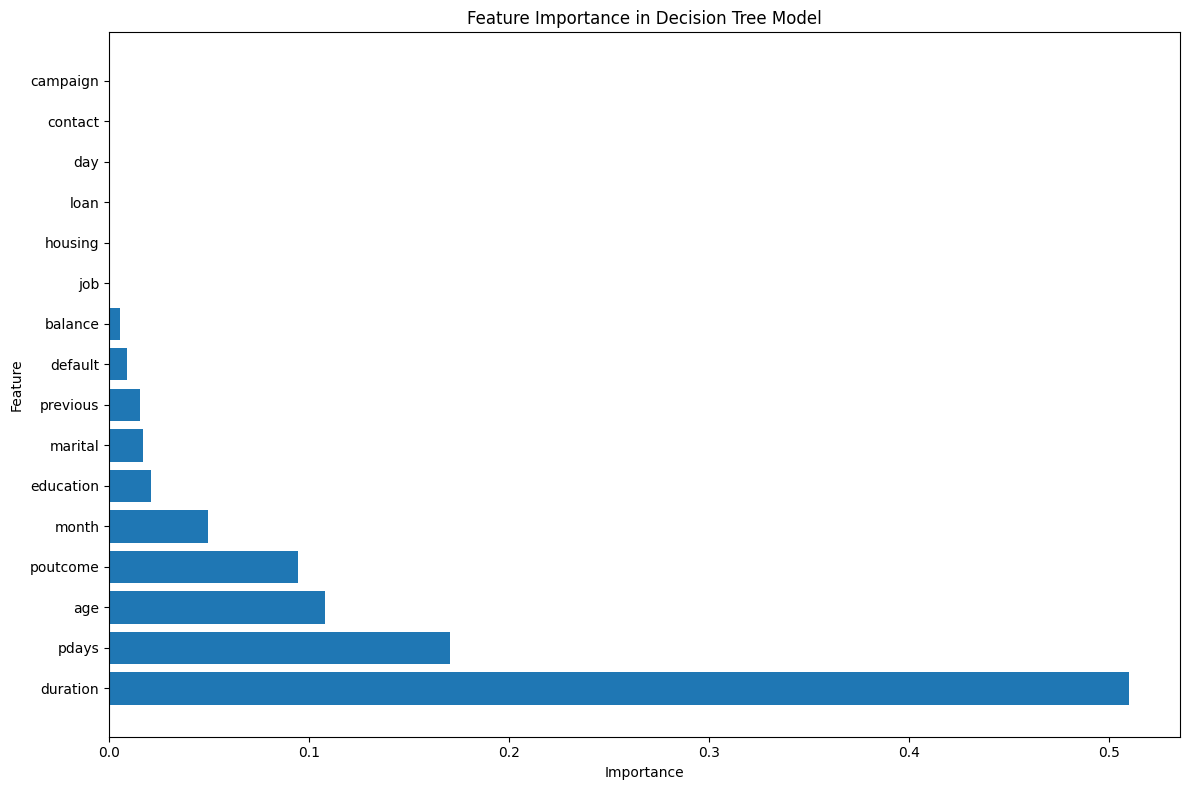

In [18]:
# Create a bar chart of feature importance
try:
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance in Decision Tree Model')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("Feature importance chart saved as 'feature_importance.png'")
except Exception as e:
    print(f"Could not create feature importance chart due to error: {e}")


In [19]:
# Visualize the decision tree - this is the main focus as requested
print("\n" + "=" * 80)
print("DECISION TREE VISUALIZATION")
print("=" * 80)

if VISUALIZATION_AVAILABLE:
    have_graphviz = is_graphviz_installed()
    if not have_graphviz:
        print("\nWARNING: Graphviz software is not installed or not in PATH.")
        print("To install Graphviz on Windows:")
        print("1. Download from https://www.graphviz.org/download/")
        print("2. Add the bin directory to your PATH environment variable")
        print("\nAttempting to create visualization anyway...")

    try:
        # Create tree visualization with full depth to show all decisions
        dot_data = export_graphviz(
            dt_model,
            out_file=None,
            feature_names=X.columns,
            class_names=['No', 'Yes'],
            filled=True,
            rounded=True,
            special_characters=True,
            max_depth=5  # Show full tree up to max_depth
        )

        graph = pydotplus.graph_from_dot_data(dot_data)

        # Use different colors for different classes
        for i, node in enumerate(graph.get_node_list()):
            if node.get_name() not in ('node', 'edge'):
                if 'samples = ' in node.get_attributes().get('label', ''):
                    # Check if this is a leaf node
                    if 'value = [' in node.get_attributes().get('label', ''):
                        values = node.get_attributes()['label']
                        if 'class = Yes' in values:
                            node.set_fillcolor('#aaffaa')  # Light green for "Yes" nodes
                        else:
                            node.set_fillcolor('#ffaaaa')  # Light red for "No" nodes

        # Save the visualization with higher resolution
        graph.write_png('decision_tree.png')
        print("Complete decision tree visualization saved as 'decision_tree.png'")
        print("Please open this file to see all the decision paths in the model.")

        # For a more detailed tree, create a text representation
        with open('decision_tree_text.txt', 'w') as f:
            # Redirect stdout to the file
            old_stdout = sys.stdout
            sys.stdout = f

            # Print tree rules
            from sklearn.tree import _tree

            def tree_to_text(tree, feature_names):
                tree_ = tree.tree_
                feature_name = [
                    feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
                    for i in tree_.feature
                ]

                def recurse(node, depth):
                    indent = "  " * depth
                    if tree_.feature[node] != _tree.TREE_UNDEFINED:
                        name = feature_name[node]
                        threshold = tree_.threshold[node]
                        print(f"{indent}if {name} <= {threshold:.4f}:")
                        recurse(tree_.children_left[node], depth + 1)
                        print(f"{indent}else:  # if {name} > {threshold:.4f}")
                        recurse(tree_.children_right[node], depth + 1)
                    else:
                        class_prob = tree_.value[node][0]
                        total = sum(class_prob)
                        prob_no = class_prob[0] / total
                        prob_yes = class_prob[1] / total
                        predicted_class = "No" if prob_no > prob_yes else "Yes"
                        print(f"{indent}class: {predicted_class} (probability: {max(prob_no, prob_yes):.4f})")

                print("DECISION TREE RULES:")
                recurse(0, 0)

            tree_to_text(dt_model, X.columns)

            # Restore stdout
            sys.stdout = old_stdout

        print("Detailed text representation of decision rules saved as 'decision_tree_text.txt'")

    except Exception as e:
        print(f"Could not create decision tree visualization due to error: {e}")
        print("Make sure you have 'graphviz' software installed on your system.")
else:
    print("\nCannot create decision tree visualization - required libraries are not available.")
    print("Please install graphviz and pydotplus packages.")



DECISION TREE VISUALIZATION
Complete decision tree visualization saved as 'decision_tree.png'
Please open this file to see all the decision paths in the model.
Detailed text representation of decision rules saved as 'decision_tree_text.txt'


In [23]:
# Function to predict for new data points entered by the user
def predict_new_customer():
    print("\n" + "=" * 80)
    print("New Customer Prediction")
    print("=" * 80)
    print("Enter the following details to predict if a customer will subscribe to a term deposit:")

    try:
        # Get user inputs for numerical features
        age = int(input("Age: "))
        balance = float(input("Account balance (in euros): "))
        day = int(input("Day of month for last contact (1-31): "))
        duration = int(input("Duration of last contact (in seconds): "))
        campaign = int(input("Number of contacts during this campaign: "))
        pdays = int(input("Days since the client was last contacted (-1 means never contacted): "))
        previous = int(input("Number of contacts before this campaign: "))

        # Get user inputs for categorical features with options
        print("\nOptions for 'job': admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown")
        job = input("Job type: ").lower()

        print("\nOptions for 'marital': divorced, married, single, unknown")
        marital = input("Marital status: ").lower()

        print("\nOptions for 'education': primary, secondary, tertiary, unknown")
        education = input("Education level: ").lower()

        print("\nOptions for 'default': yes, no, unknown")
        default = input("Has credit in default? ").lower()

        print("\nOptions for 'housing': yes, no, unknown")
        housing = input("Has housing loan? ").lower()

        print("\nOptions for 'loan': yes, no, unknown")
        loan = input("Has personal loan? ").lower()

        print("\nOptions for 'contact': cellular, telephone, unknown")
        contact = input("Contact communication type: ").lower()

        print("\nOptions for 'month': jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec")
        month = input("Month of last contact: ").lower()

        print("\nOptions for 'poutcome': failure, other, success, unknown")
        outcome = input("Outcome of the previous marketing campaign: ").lower()

        # Create a dictionary for the new customer data
        new_customer = {
            'age': [age],
            'job': [job],
            'marital': [marital],
            'education': [education],
            'default': [default],
            'balance': [balance],
            'housing': [housing],
            'loan': [loan],
            'contact': [contact],
            'day': [day],
            'month': [month],
            'duration': [duration],
            'campaign': [campaign],
            'pdays': [pdays],
            'previous': [previous],
            'poutcome': [outcome]
        }

        # Convert to DataFrame
        new_df = pd.DataFrame(new_customer)

        # Encode categorical variables to match the training data
        for col in categorical_cols[:-1]:  # Excluding 'y' which is the target
            # Get unique values from training data for this column
            unique_values = df[col].unique()

            # Check if the provided value is valid
            if new_df[col][0] not in unique_values:
                print(f"Warning: Provided value '{new_df[col][0]}' for '{col}' is not in the training data.")
                print(f"Available options are: {', '.join(unique_values)}")
                # Assigning a default value
                new_df[col][0] = unique_values[0]
                print(f"Using '{unique_values[0]}' as default.")

            # Fit and transform
            new_df[col] = label_encoder.fit_transform(df[col].append(new_df[col])).tail(1).values

        # Make prediction
        prediction = dt_model.predict(new_df)
        probability = dt_model.predict_proba(new_df)

        print("\n" + "=" * 80)
        print("Prediction Result:")
        if prediction[0] == 1:
            print(f"The customer is LIKELY to subscribe to a term deposit (Confidence: {probability[0][1]:.2f})")
        else:
            print(f"The customer is UNLIKELY to subscribe to a term deposit (Confidence: {probability[0][0]:.2f})")
        print("=" * 80)

        # Show the decision path for this customer
        print("\nDecision path for this customer:")
        node_indicator = dt_model.decision_path(new_df)
        leaf_id = dt_model.apply(new_df)

        feature = dt_model.tree_.feature
        threshold = dt_model.tree_.threshold

        node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

        for node_id in node_index:
            # Continue to the next node if it's a leaf
            if leaf_id[0] == node_id:
                print(f"🏁 Final prediction: {'Yes' if prediction[0] == 1 else 'No'}")
                continue

            # Check if the sample goes through the left or right branch
            if new_df.iloc[0, feature[node_id]] <= threshold[node_id]:
                threshold_sign = "<="
                direction = "left"
            else:
                threshold_sign = ">"
                direction = "right"

            print(f"➡️ {X.columns[feature[node_id]]} {threshold_sign} {threshold[node_id]:.4f} ({direction} branch)")

    except Exception as e:
        print(f"Error processing input: {e}")
        print("Please make sure you enter valid values for all fields.")

# Ask if user wants to make predictions for new customers
print("\n" + "=" * 80)
print("Would you like to predict for a new customer? This will show you the exact")
print("decision path taken for that customer through the decision tree.")
print("=" * 80)

while True:
    response = input("\nPredict for a new customer? (yes/no): ").lower()
    if response == 'yes':
        predict_new_customer()
    else:
        print("\nThank you for using the Bank Marketing Decision Tree Predictor!")
        break


Would you like to predict for a new customer? This will show you the exact
decision path taken for that customer through the decision tree.

Predict for a new customer? (yes/no): yes

New Customer Prediction
Enter the following details to predict if a customer will subscribe to a term deposit:
Age: 36
Account balance (in euros): 535
Day of month for last contact (1-31): 1
Duration of last contact (in seconds): 300
Number of contacts during this campaign: 5
Days since the client was last contacted (-1 means never contacted): 15
Number of contacts before this campaign: 4

Options for 'job': admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown
Job type: management

Options for 'marital': divorced, married, single, unknown
Marital status: married

Options for 'education': primary, secondary, tertiary, unknown
Education level: tertiary

Options for 'default': yes, no, unknown
Has credit in default? no

Options f

KeyboardInterrupt: Interrupted by user

# Data Set 2

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
# load dataset
df = pd.read_csv("/content/gene_expression.csv")
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [27]:
#split dataset in features and target variable
x_data=df[['Gene One','Gene Two']]
y_data=df['Cancer Present']

In [28]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model2 = dt_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model2.predict(X_test)

In [29]:
#split dataset in features and target variable
x_data=df[['Gene One','Gene Two']]
y_data=df['Cancer Present']

# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # Split the data

# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model2 = dt_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model2.predict(X_test)

In [30]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9155555555555556


In [37]:
#prediction = cancer_model.predict(new_patient_data)[0]

def predict_cancer():
    while True:
        try:
            gene_one = float(input("Enter Gene One value: "))
            gene_two = float(input("Enter Gene Two value: "))

            # Input validation
            if gene_one < 0 or gene_two < 0:
                print("Error: Please enter non-negative values for all features.")
                continue  # Restart the loop

            new_patient_data = pd.DataFrame([[gene_one, gene_two]],
                                            columns=['Gene One', 'Gene Two'])

            prediction = dt_model2.predict(new_patient_data)[0]

            if prediction == 1:
                print("Prediction: Patient is likely to have cancer.")
            else:
                print("Prediction: Patient is likely not to have cancer.")

            another_patient = input("Enter data for another patient? (yes/no): ")
            if another_patient.lower() != 'yes':
                break  # Exit loop
        except ValueError:
            print("Invalid input. Please enter valid numerical values.")

predict_cancer()

Enter Gene One value: 20
Enter Gene Two value: 50
Prediction: Patient is likely to have cancer.
Enter data for another patient? (yes/no): no


In [38]:
!pip install graphviz
!pip install pydotplus
!pip install six

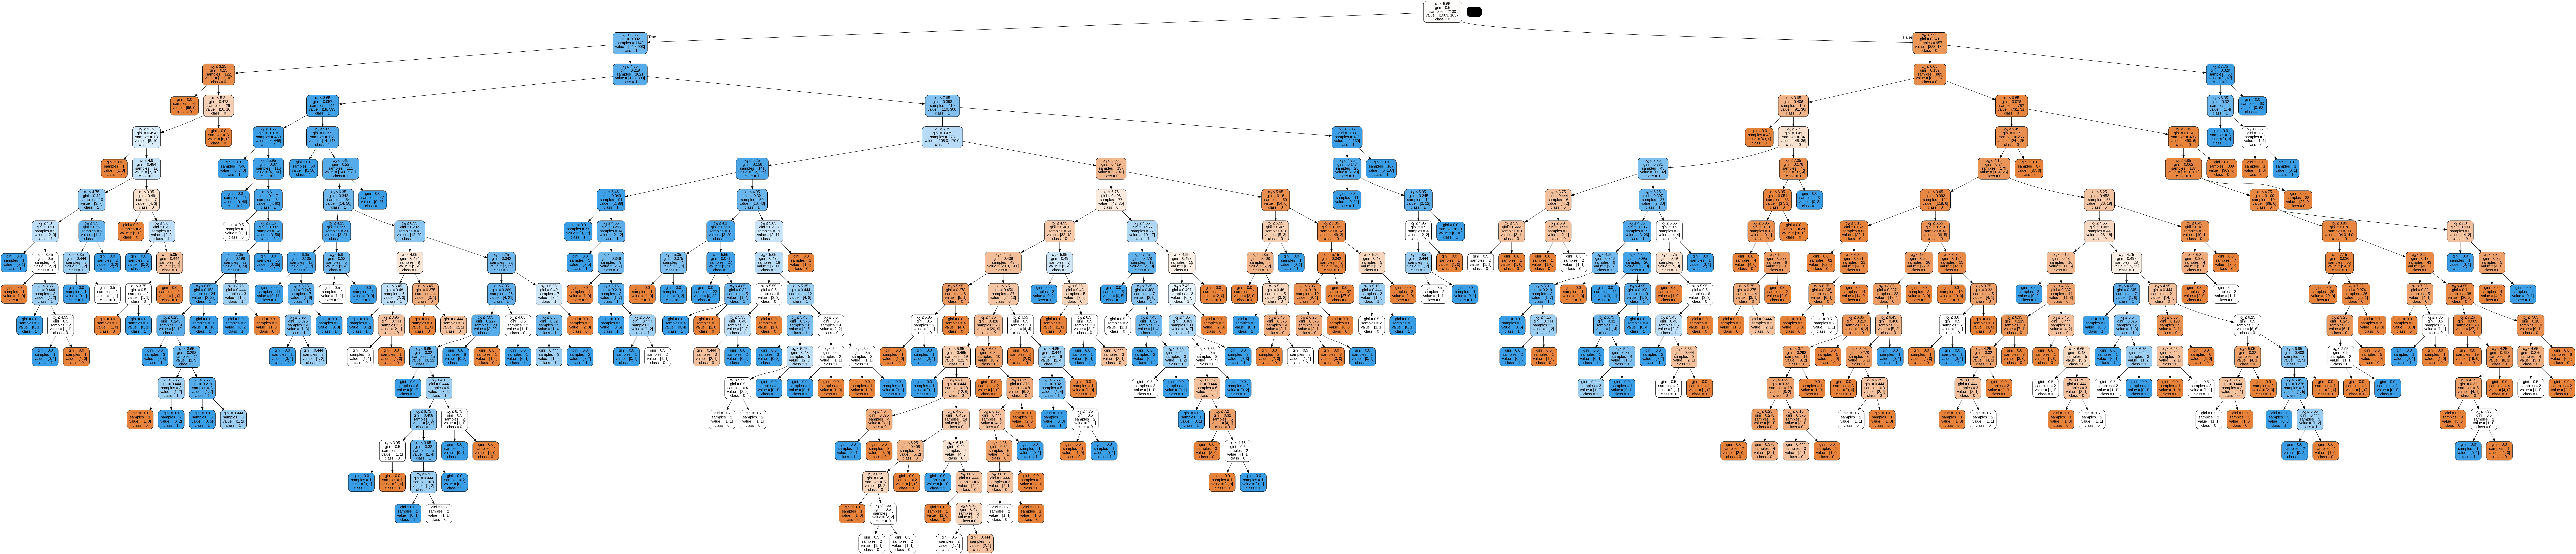

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Get unique class labels from your target variable
class_names = [str(label) for label in np.unique(y_data)]

dot_data = StringIO()
export_graphviz(dt_model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Dear Mr.Eugenia, to analyze the possilibities of getting cancer, we used this dataset to create a Decision Tree. Our model accuracy was .20, and we were able to graph the results to find each decision rule and outcome.

https://www.kaggle.com/datasets/brsahan/genomic-data-for-cancer


# Data Set 3

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [41]:
# load dataset
df = pd.read_csv("/content/steps_tracker_dataset.csv")
df.head()


date  steps  distance_km  calories_burned  active_minutes  \
0  08/10/2022   4147         3.11           124.41              41   
1  11/06/2022    323         0.24             9.69               3   
2  28/01/2022   6622         4.97           198.66              66   
3  23/03/2022  11136         8.35           334.08             111   
4  20/05/2022   2718         2.04            81.54              27   

   sleep_hours  water_intake_liters      mood  
0         10.5                 3.77  stressed  
1          6.0                 1.90       sad  
2          6.0                 4.48       sad  
3          8.0                 1.08     tired  
4          4.9                 1.00     tired

In [43]:
# Split dataset into features and target variable
X_data = df[['steps', 'distance_km', 'calories_burned', 'active_minutes',
             'sleep_hours', 'water_intake_liters']]  # Remove 'date' column
y_data = df['mood']  # Ensure 'mood' is the target variable


In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

In [45]:
# Train a single Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

# Calculate the accuracy and assign it to dt_accuracy
# Train a single Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Calculate the accuracy and assign it to dt_accuracy
dt_accuracy = dt_model.score(X_test, y_test)

print("Decision Tree Test Accuracy:", f"{dt_accuracy * 100:.2f}%")


Decision Tree Test Accuracy: 18.67%


In [46]:
# Train a Random Forest with random feature selection
rf_model = RandomForestClassifier(n_estimators=5, max_features=2, random_state=42)  # max_features=2 means only 2 features are considered at each split

rf_model.fit(X_train, y_train)


# Calculate the accuracy and assign it to rf_accuracy
rf_accuracy = rf_model.score(X_test, y_test)


# Train a Random Forest with random feature selection
rf_model = RandomForestClassifier(n_estimators=5, max_features=2, random_state=42)  # max_features=2 means only 2 features are considered at each split


rf_model.fit(X_train, y_train)


# Calculate the accuracy and assign it to rf_accuracy
rf_accuracy = rf_model.score(X_test, y_test)

# Now you can use rf_accuracy in the print statements below
print("RF Model Accuracy:", f"{rf_accuracy * 100:.2f}", "%")



RF Model Accuracy: 14.67 %


In [49]:
# Calculate precision, recall, and F1-score for Random Forest
# Using 'weighted' average to account for class imbalance
precision_rf = metrics.precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = metrics.recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')

print("RF Precision:", precision_rf)
print("RF Recall:", recall_rf)
print("RF F1-Score:", f1_rf)

NameError: name 'precision_score' is not defined

In [ ]:
import pandas as pd

def predict_mood():
    while True:
        try:
            date = input("Enter date (DD/MM/YYYY): ")
import pandas as pd

def predict_mood():
    while True:
        try:
            date = input("Enter date (DD/MM/YYYY): ")
            steps = int(input("Enter number of steps: "))
            distance_km = float(input("Enter distance in km: "))
            calories_burned = float(input("Enter calories burned: "))
            active_minutes = int(input("Enter active minutes: "))
            sleep_hours = float(input("Enter sleep hours: "))
            water_intake = float(input("Enter water intake in liters: "))

            # Input validation: Ensure non-negative values
            if any(val < 0 for val in [steps, distance_km, calories_burned, active_minutes, sleep_hours, water_intake]):
                print("Please enter non-negative values for all inputs.")
                continue

            # ... (rest of your function)

        except ValueError:
            print("Invalid input. Please enter valid numbers.")
            continue

        # ... (rest of your function)
    while True:
        try:
            date = input("Enter date (DD/MM/YYYY): ")
            steps = int(input("Enter number of steps: "))
            distance_km = float(input("Enter distance in km: "))
            calories_burned = float(input("Enter calories burned: "))
            active_minutes = int(input("Enter active minutes: "))
            sleep_hours = float(input("Enter sleep hours: "))
            water_intake = float(input("Enter water intake in liters: "))

            # Input validation: Ensure non-negative values
            if any(val < 0 for val in [steps, distance_km, calories_burned, active_minutes, sleep_hours, water_intake]):
                print("Please enter non-negative values for all inputs.")
                continue

            # ... (rest of your function)

        except ValueError:
            print("Invalid input. Please enter valid numbers.")
            continue

        # ... (rest of your function)
    while True:
        try:
            date = input("Enter date (DD/MM/YYYY): ")
            steps = int(input("Enter number of steps: "))
            distance_km = float(input("Enter distance in km: "))
            calories_burned = float(input("Enter calories burned: "))
            active_minutes = int(input("Enter active minutes: "))
            sleep_hours = float(input("Enter sleep hours: "))
            water_intake = float(input("Enter water intake in liters: "))

            # Input validation: Ensure non-negative values
            if any(val < 0 for val in [steps, distance_km, calories_burned, active_minutes, sleep_hours, water_intake]):
                print("Please enter non-negative values for all inputs.")
                continue

            # ... (rest of your function)

        except ValueError:
            print("Invalid input. Please enter valid numbers.")
            continue

        # ... (rest of your function)
    while True:
        try:
            date = input("Enter date (DD/MM/YYYY): ")
            steps = int(input("Enter number of steps: "))
            distance_km = float(input("Enter distance in km: "))
            calories_burned = float(input("Enter calories burned: "))
            active_minutes = int(input("Enter active minutes: "))
            sleep_hours = float(input("Enter sleep hours: "))
            water_intake = float(input("Enter water intake in liters: "))

            # Input validation: Ensure non-negative values
            if any(val < 0 for val in [steps, distance_km, calories_burned, active_minutes, sleep_hours, water_intake]):
                print("Please enter non-negative values for all inputs.")
                continue

            # ... (rest of your function)

        except ValueError:
            print("Invalid input. Please enter valid numbers.")
            continue

        # ... (rest of your function)

SyntaxError: expected 'except' or 'finally' block (<ipython-input-35-8f558bc1bc1a>, line 7)

In [ ]:
# For the feature importance, show a table of features and its corresponding values

# Get feature names used in training the Random Forest
feature_names = X_train.columns  # Assuming X_train was used to train rf_model

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

feature  importance
5  water_intake_liters    0.220273
0                steps    0.174520
4          sleep_hours    0.170409
2      calories_burned    0.165124
1          distance_km    0.161574
3       active_minutes    0.108100

Dear Mr.Eugenia, we wanted to decide how each sleeping parameter could effect a person's mood. Using this dataset we created a Random Forest, which will allow us to extend a Decision Tree and find the lowest outcome.

https://www.kaggle.com/datasets/monicahjones/steps-tracker-dataset

# Data Set 4

In [57]:
!pip install ucimlrepo

In [58]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Apartment Rental Price Prediction using Random Forest
This script analyzes what factors we can control to optimize rental listings.
Focus is on actionable insights for property managers and landlords.
"""

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz, plot_tree
import graphviz
from ucimlrepo import fetch_ucirepo


In [59]:
# Set style for better visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Set random seed for reproducibility
np.random.seed(42)

In [60]:
# Step 1: Load the dataset
print("\nStep 1: Loading dataset...")
apartment_data = fetch_ucirepo(id=555) #UCI ML Repo for Apartment Rent Classified
df = pd.concat([apartment_data.data.features, apartment_data.data.targets], axis=1)
print("\nInitial dataset shape:", df.shape)


Step 1: Loading dataset...

Initial dataset shape: (99826, 21)


/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [61]:
# Step 2: Data Cleaning and Preprocessing
print("\nStep 2: Data Cleaning and Preprocessing...")
# Convert numeric columns from object to float
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')


Step 2: Data Cleaning and Preprocessing...


In [62]:
# Fill missing values first
df['square_feet'] = df['square_feet'].fillna(df['square_feet'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [63]:
# Remove outliers (prices that are too high or too low)
q1 = df['price'].quantile(0.01)
q3 = df['price'].quantile(0.99)
df = df[(df['price'] >= q1) & (df['price'] <= q3)]

In [64]:
# Step 3: Feature Engineering - Separated by Controllable vs Uncontrollable Factors
print("\nStep 3: Feature Engineering - Focusing on Controllable Factors...")

# Controllable Features (things we can influence):
print("\nAnalyzing Controllable Features:")

print("1. Listing Presentation:")
df['has_description'] = df['body'].notna().astype(int)
df['description_length'] = df['body'].str.len().fillna(0)
df['title_length'] = df['title'].str.len().fillna(0)
df['has_photo'] = df['has_photo'].fillna('false').astype(str).str.lower()
df['has_photo'] = (df['has_photo'] == 'true').astype(int)

print("2. Amenities and Policies:")
df['amenities_count'] = df['amenities'].str.count(',').fillna(0) + 1
df['pets_allowed'] = df['pets_allowed'].fillna('false').astype(str).str.lower()
df['pets_allowed'] = (df['pets_allowed'] == 'true').astype(int)

print("3. Timing Strategy:")
df['posting_date'] = pd.to_datetime(df['time'], unit='s')
df['posting_month'] = df['posting_date'].dt.month
df['posting_day_of_week'] = df['posting_date'].dt.dayofweek
df['is_weekend'] = df['posting_day_of_week'].isin([5, 6]).astype(int)


Step 3: Feature Engineering - Focusing on Controllable Factors...

Analyzing Controllable Features:
1. Listing Presentation:
2. Amenities and Policies:
3. Timing Strategy:


In [65]:
# Uncontrollable Features (for context):
print("\nTracking Uncontrollable Features:")
print("1. Location Factors:")
df['state_mean_price'] = df.groupby('state')['price'].transform('mean')
df['city_mean_price'] = df.groupby('cityname')['price'].transform('mean')


Tracking Uncontrollable Features:
1. Location Factors:


In [66]:
# Analyze impact of controllable features
print("\nAnalyzing Impact of Controllable Features:")

# 1. Impact of Listing Quality
print("\nListing Quality Analysis:")


Analyzing Impact of Controllable Features:

Listing Quality Analysis:


In [67]:
# Print unique values for debugging
print("\nUnique values in has_photo:", df['has_photo'].unique())
print("Unique values in has_description:", df['has_description'].unique())


Unique values in has_photo: [0]
Unique values in has_description: [1]


In [68]:
# Photos impact
print("\nPhoto Statistics:")
photo_counts = df['has_photo'].value_counts()
photo_means = df.groupby('has_photo')['price'].mean()

for val in sorted(df['has_photo'].unique()):
    count = photo_counts[val]
    mean_price = photo_means[val]
    status = "with" if val == 1 else "without"
    print(f"Listings {status} photos (count={count}):")
    print(f"Average price: ${mean_price:,.2f}")

if len(photo_means) == 2:
    photo_impact = ((photo_means[1] - photo_means[0]) / photo_means[0] * 100)
    print(f"Price difference: {photo_impact:.1f}%")


Photo Statistics:
Listings without photos (count=97884):
Average price: $1,488.32


In [69]:
# Description impact
print("\nDescription Statistics:")
desc_counts = df['has_description'].value_counts()
desc_means = df.groupby('has_description')['price'].mean()

for val in sorted(df['has_description'].unique()):
    count = desc_counts[val]
    mean_price = desc_means[val]
    status = "with" if val == 1 else "without"
    print(f"Listings {status} descriptions (count={count}):")
    print(f"Average price: ${mean_price:,.2f}")

if len(desc_means) == 2:
    desc_impact = ((desc_means[1] - desc_means[0]) / desc_means[0] * 100)
    print(f"Price difference: {desc_impact:.1f}%")


Description Statistics:
Listings with descriptions (count=97884):
Average price: $1,488.32


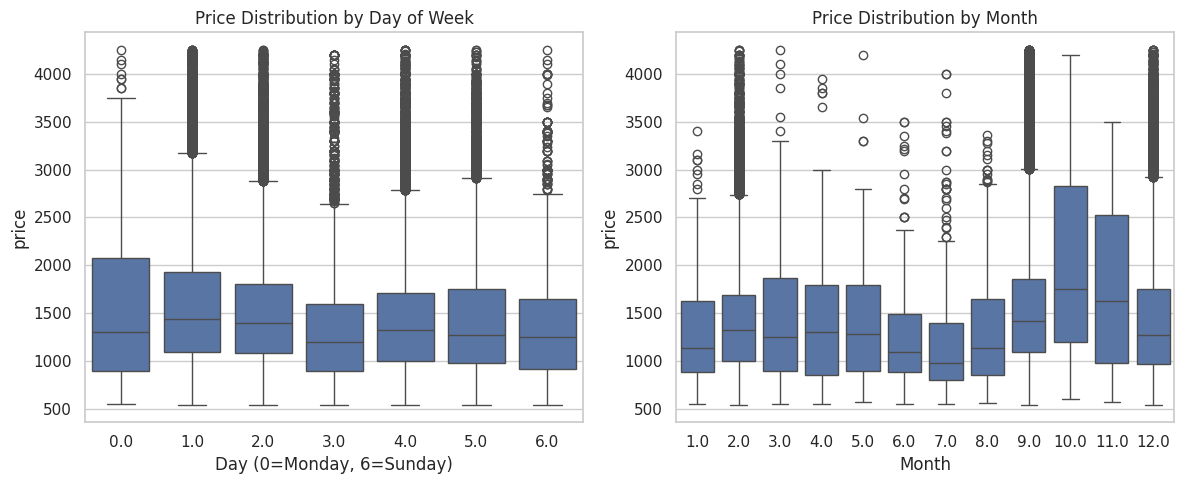

In [70]:
# 2. Timing Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='posting_day_of_week', y='price', data=df)
plt.title('Price Distribution by Day of Week')
plt.xlabel('Day (0=Monday, 6=Sunday)')

plt.subplot(1, 2, 2)
sns.boxplot(x='posting_month', y='price', data=df)
plt.title('Price Distribution by Month')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

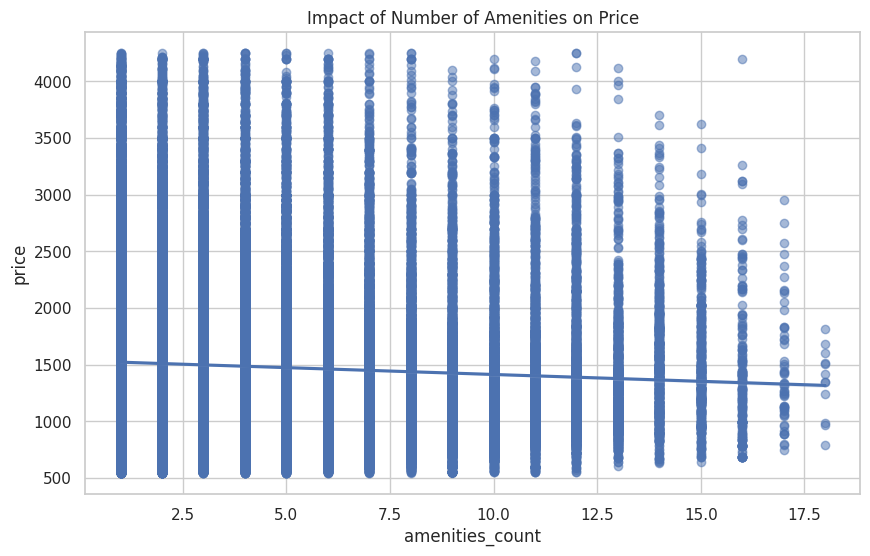

In [71]:
# 3. Amenities Impact
plt.figure(figsize=(10, 6))
sns.regplot(x='amenities_count', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title('Impact of Number of Amenities on Price')
plt.show()

In [72]:
# Select features for modeling, prioritizing controllable factors
controllable_features = [
    # Listing Presentation
    'has_photo', 'has_description', 'description_length', 'title_length',

    # Property Features
    'square_feet', 'bedrooms', 'bathrooms', 'amenities_count',

    # Policies
    'pets_allowed',

    # Timing
    'posting_month', 'posting_day_of_week', 'is_weekend'
]

context_features = [
    'state_mean_price', 'city_mean_price', 'latitude', 'longitude'
]

X = df[controllable_features + context_features]
y = df['price']


In [73]:
# Split and train as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_jobs=-1, random_state=42)

In [74]:
# Analyze feature importance specifically for controllable features
controllable_importance = pd.DataFrame({
    'feature': controllable_features,
    'importance': rf_model.feature_importances_[:len(controllable_features)]
})
controllable_importance = controllable_importance.sort_values('importance', ascending=False)

print("\nImportance of Controllable Features:")
print(controllable_importance)


Importance of Controllable Features:
                feature  importance
4           square_feet    0.143910
6             bathrooms    0.044033
2    description_length    0.026449
7       amenities_count    0.012347
3          title_length    0.011781
5              bedrooms    0.007130
10  posting_day_of_week    0.005422
9         posting_month    0.004000
11           is_weekend    0.000680
1       has_description    0.000000
0             has_photo    0.000000
8          pets_allowed    0.000000


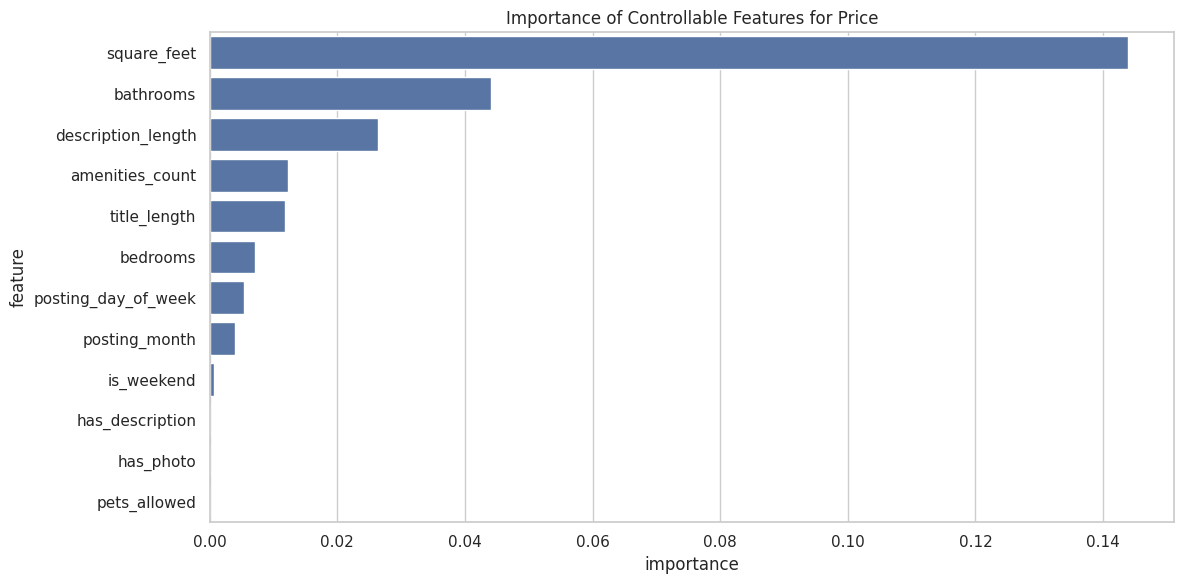

In [75]:
# Visualize importance of controllable features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=controllable_importance)
plt.title('Importance of Controllable Features for Price')
plt.tight_layout()
plt.show()

In [76]:
# Generate actionable recommendations
print("\nActionable Recommendations for Listing Optimization:")
print("1. Listing Presentation:")
top_presentation_features = controllable_importance[
    controllable_importance['feature'].isin(['has_photo', 'description_length', 'title_length'])
]
for _, row in top_presentation_features.iterrows():
    print(f"- {row['feature']}: Impact Score = {row['importance']:.4f}")

print("\n2. Property Features:")
top_property_features = controllable_importance[
    controllable_importance['feature'].isin(['square_feet', 'bedrooms', 'bathrooms', 'amenities_count'])
]
for _, row in top_property_features.iterrows():
    print(f"- {row['feature']}: Impact Score = {row['importance']:.4f}")

print("\n3. Timing Strategy:")
timing_features = controllable_importance[
    controllable_importance['feature'].isin(['posting_month', 'posting_day_of_week', 'is_weekend'])
]
for _, row in timing_features.iterrows():
    print(f"- {row['feature']}: Impact Score = {row['importance']:.4f}")


Actionable Recommendations for Listing Optimization:
1. Listing Presentation:
- description_length: Impact Score = 0.0264
- title_length: Impact Score = 0.0118
- has_photo: Impact Score = 0.0000

2. Property Features:
- square_feet: Impact Score = 0.1439
- bathrooms: Impact Score = 0.0440
- amenities_count: Impact Score = 0.0123
- bedrooms: Impact Score = 0.0071

3. Timing Strategy:
- posting_day_of_week: Impact Score = 0.0054
- posting_month: Impact Score = 0.0040
- is_weekend: Impact Score = 0.0007


In [77]:
# Calculate optimal posting time
best_day = int(df.groupby('posting_day_of_week')['price'].mean().idxmax())
best_month = int(df.groupby('posting_month')['price'].mean().idxmax())

print(f"\nOptimal Posting Time:")
print(f"Best day to post: Day {best_day} (0=Monday, 6=Sunday)")
print(f"Best month to post: Month {best_month}")


Optimal Posting Time:
Best day to post: Day 0 (0=Monday, 6=Sunday)
Best month to post: Month 10



Visualizing Random Forest Structure...


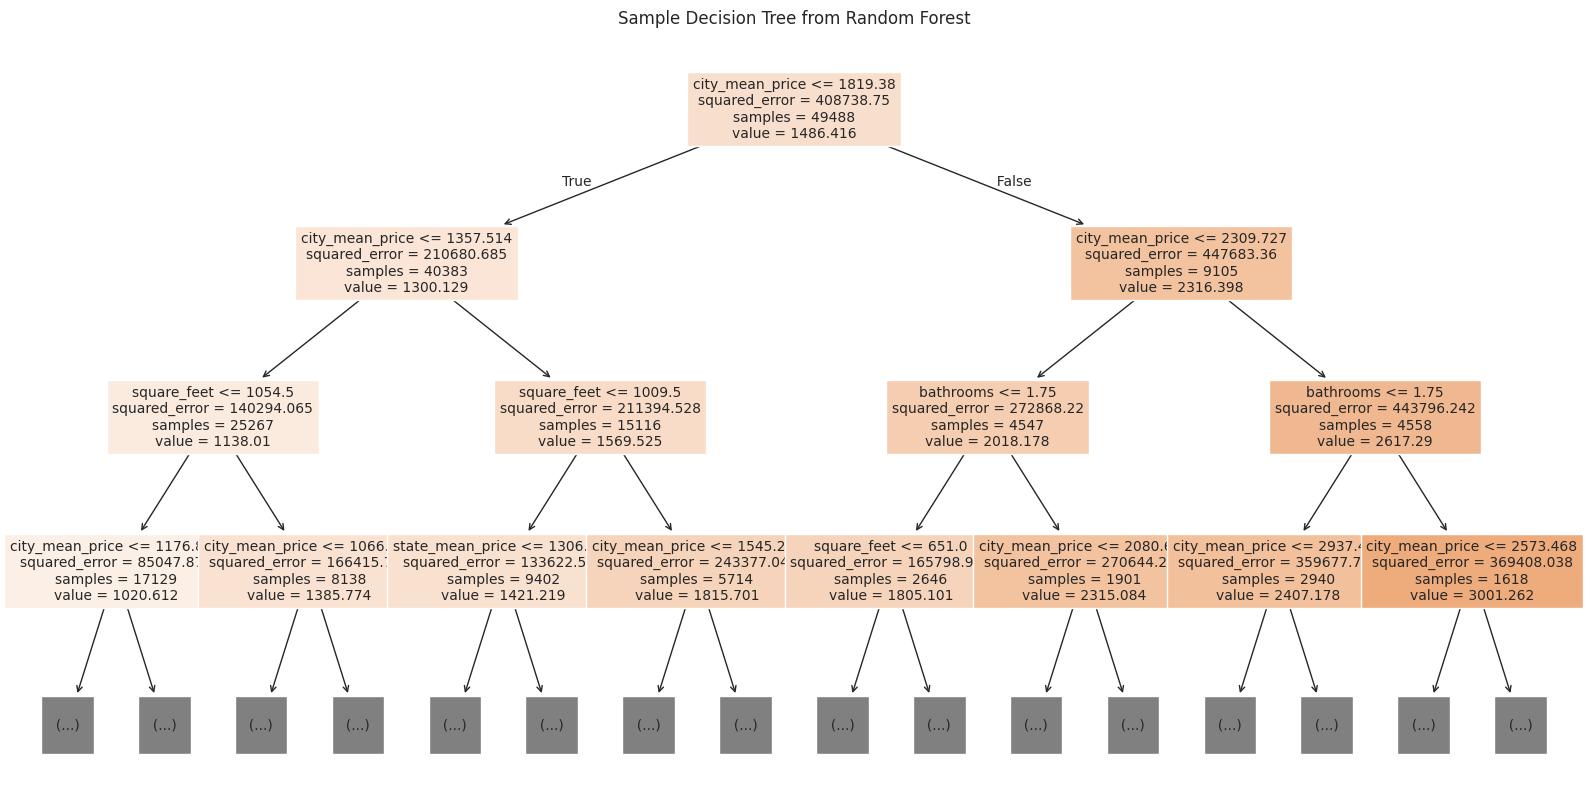

In [78]:
# After training the model and before the interactive section, add:

print("\nVisualizing Random Forest Structure...")

# Visualize a single tree from the forest
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          filled=True,
          max_depth=3,  # Limit depth for visibility
          fontsize=10)
plt.title("Sample Decision Tree from Random Forest")
plt.show()


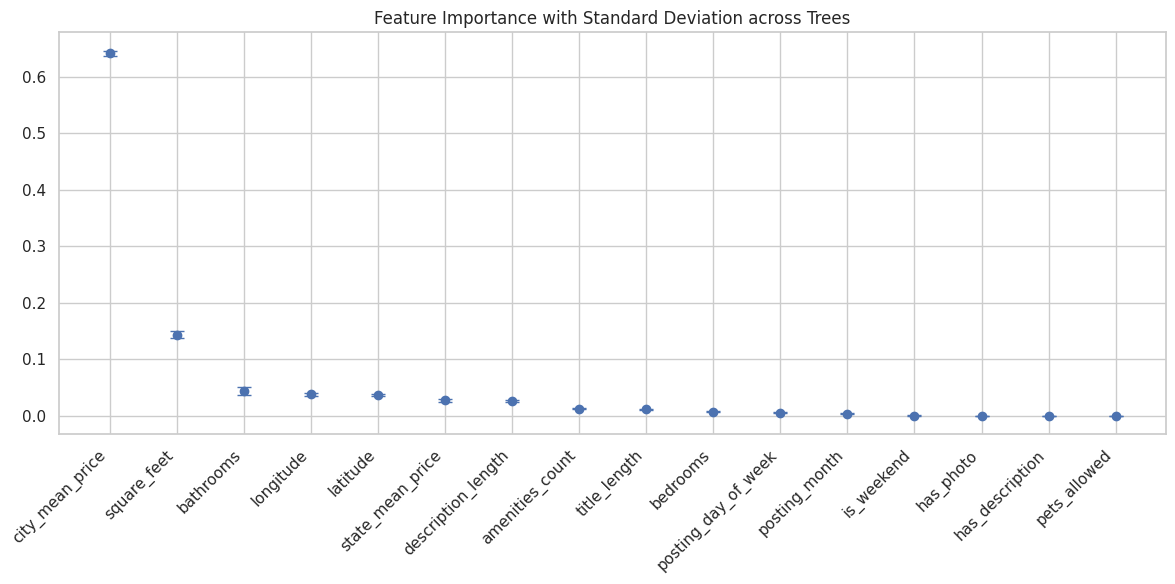

In [79]:
# Create feature importance plot with error bars
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_,
    'std': np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.errorbar(x=range(len(importances)),
            y=importances['importance'],
            yerr=importances['std'],
            fmt='o',
            capsize=5)
plt.xticks(range(len(importances)), importances['feature'], rotation=45, ha='right')
plt.title('Feature Importance with Standard Deviation across Trees')
plt.tight_layout()
plt.show()


Analyzing Decision Paths for Different Price Ranges...


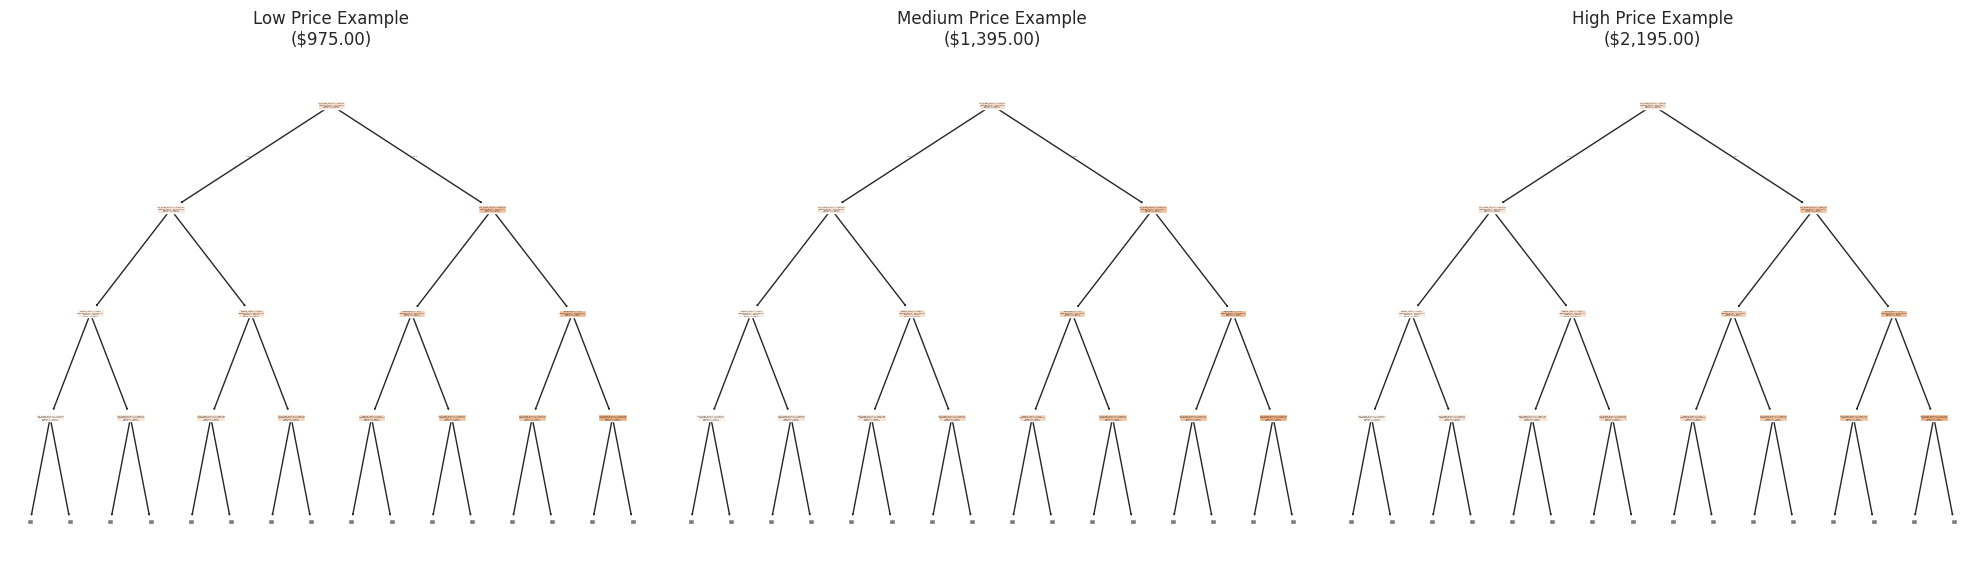

In [80]:
# Visualize tree paths for different price ranges
print("\nAnalyzing Decision Paths for Different Price Ranges...")
sample_indices = [
    df[df['price'] < df['price'].quantile(0.25)].index[0],  # Low price
    df[df['price'].between(df['price'].quantile(0.45), df['price'].quantile(0.55))].index[0],  # Medium price
    df[df['price'] > df['price'].quantile(0.75)].index[0]  # High price
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for idx, (ax, sample_idx) in enumerate(zip(axes, sample_indices)):
    price_category = ['Low', 'Medium', 'High'][idx]
    sample_price = df.loc[sample_idx, 'price']

    plot_tree(rf_model.estimators_[0],
              feature_names=X.columns,
              filled=True,
              max_depth=3,
              ax=ax)
    ax.set_title(f'{price_category} Price Example\n(${sample_price:,.2f})')

plt.tight_layout()
plt.show()



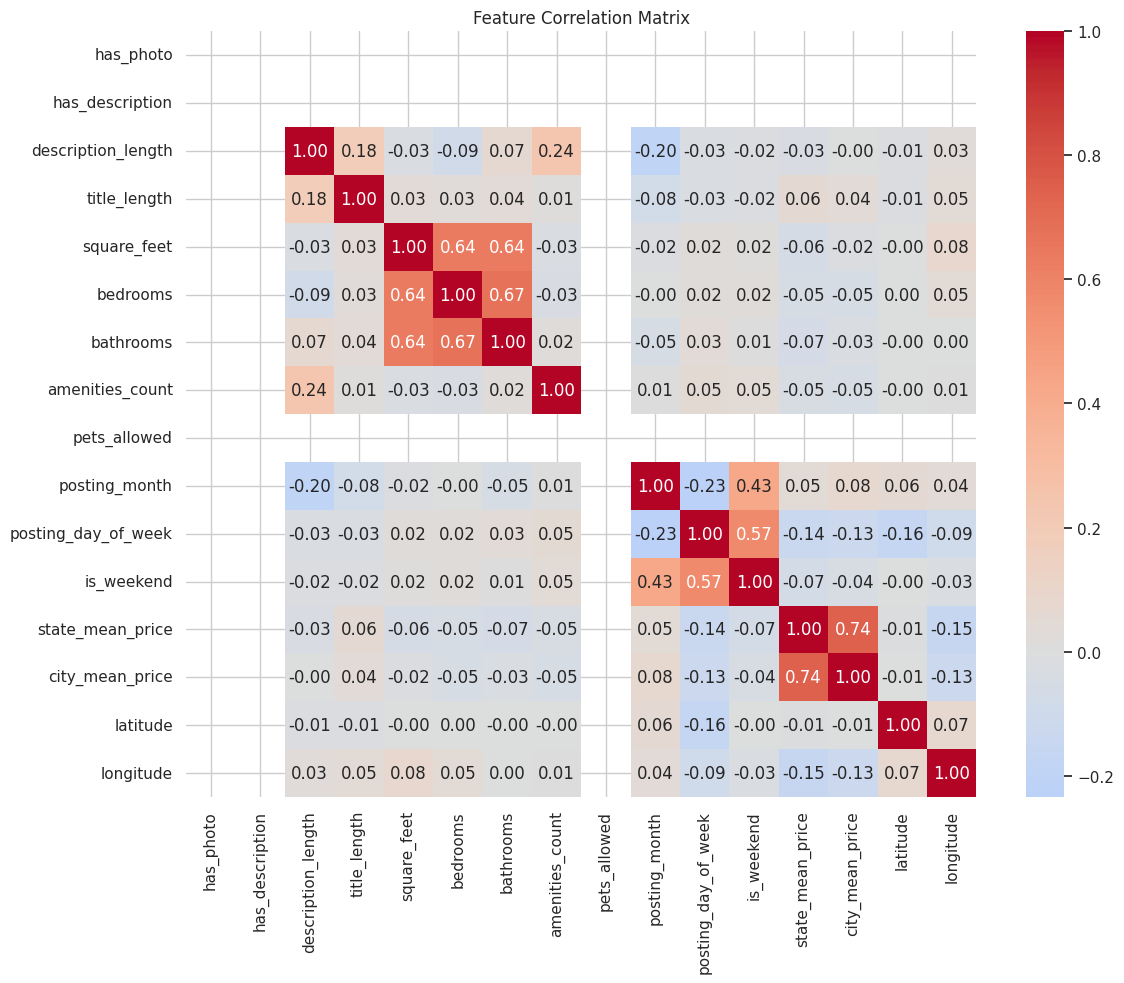

In [81]:
# Create a correlation matrix heatmap for feature relationships
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [82]:
# Interactive Section for User Input and Recommendations
print("\n" + "="*50)
print("Interactive Listing Analyzer")
print("="*50)
print("\nEnter your listing details to get predictions and recommendations:")

def get_numeric_input(prompt, min_val=0, max_val=float('inf'), allow_float=True):
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value if allow_float else int(value)
            print(f"Please enter a value between {min_val} and {max_val}")
        except ValueError:
            print("Please enter a valid number")

def get_yes_no_input(prompt):
    while True:
        response = input(prompt + " (yes/no): ").lower()
        if response in ['yes', 'y']:
            return 1
        elif response in ['no', 'n']:
            return 0
        print("Please enter 'yes' or 'no'")

try:
    # Get user input for listing details
    square_feet = get_numeric_input("Square feet: ", min_val=100)
    bedrooms = get_numeric_input("Number of bedrooms: ", min_val=0, max_val=10, allow_float=False)
    bathrooms = get_numeric_input("Number of bathrooms: ", min_val=0, max_val=10)

    has_photo = get_yes_no_input("Do you have photos for the listing?")
    has_description = get_yes_no_input("Do you have a description for the listing?")

    description_length = 0
    if has_description:
        description = input("Enter your listing description (or press Enter to skip): ")
        description_length = len(description)

    title = input("Enter your listing title: ")
    title_length = len(title)

    amenities = input("Enter amenities (comma-separated, or press Enter if none): ")
    amenities_count = len(amenities.split(',')) if amenities.strip() else 0

    pets_allowed = get_yes_no_input("Are pets allowed?")

    # Get location details
    latitude = get_numeric_input("Latitude (e.g., 37.7749): ", min_val=-90, max_val=90)
    longitude = get_numeric_input("Longitude (e.g., -122.4194): ", min_val=-180, max_val=180)

    # Use median values from the dataset for context features if not available
    state_mean_price = df['state_mean_price'].median()
    city_mean_price = df['city_mean_price'].median()

    # Current month and day
    from datetime import datetime
    current_date = datetime.now()
    posting_month = current_date.month
    posting_day_of_week = current_date.weekday()
    is_weekend = 1 if posting_day_of_week >= 5 else 0

    # Create input data for prediction
    input_data = pd.DataFrame({
        'has_photo': [has_photo],
        'has_description': [has_description],
        'description_length': [description_length],
        'title_length': [title_length],
        'square_feet': [square_feet],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'amenities_count': [amenities_count],
        'pets_allowed': [pets_allowed],
        'posting_month': [posting_month],
        'posting_day_of_week': [posting_day_of_week],
        'is_weekend': [is_weekend],
        'state_mean_price': [state_mean_price],
        'city_mean_price': [city_mean_price],
        'latitude': [latitude],
        'longitude': [longitude]
    })

    # Make prediction
    predicted_price = rf_model.predict(input_data)[0]

    print("\n" + "="*50)
    print("Listing Analysis Results")
    print("="*50)
    print(f"\nPredicted Rental Price: ${predicted_price:,.2f}")

    # Generate recommendations
    print("\nRecommendations to Optimize Your Listing:")

    if not has_photo:
        print("➤ Add photos to your listing - listings with photos tend to perform better")

    if description_length < df['description_length'].mean():
        print("➤ Consider adding more detail to your description")
        print(f"  Current length: {description_length} characters")
        print(f"  Average length: {int(df['description_length'].mean())} characters")

    if title_length < df['title_length'].mean():
        print("➤ Your title could be more descriptive")
        print(f"  Current length: {title_length} characters")
        print(f"  Average length: {int(df['title_length'].mean())} characters")

    if amenities_count < df['amenities_count'].mean():
        print("➤ Consider highlighting more amenities in your listing")
        print(f"  Current amenities: {amenities_count}")
        print(f"  Average amenities: {int(df['amenities_count'].mean())}")

    # Timing recommendations
    if posting_day_of_week != best_day:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        print(f"➤ Consider posting on {days[best_day]} for potentially better results")

    if posting_month != best_month:
        months = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']
        print(f"➤ The best month for listings is typically {months[best_month-1]}")

    print("\nNote: These recommendations are based on historical data and market trends.")
    print("Individual results may vary based on local market conditions.")

except KeyboardInterrupt:
    print("\n\nAnalysis cancelled by user.")
except Exception as e:
    print(f"\n\nAn error occurred: {str(e)}")


Interactive Listing Analyzer

Enter your listing details to get predictions and recommendations:
Square feet: 
Please enter a valid number
Square feet: 1500
Number of bedrooms: 3
Number of bathrooms: 2
Do you have photos for the listing? (yes/no): no
Do you have a description for the listing? (yes/no): no
Enter your listing title: $2500/mo
Enter amenities (comma-separated, or press Enter if none): Pool, Laundry
Are pets allowed? (yes/no): no
Latitude (e.g., 37.7749): 37.7750
Longitude (e.g., -122.4194): -119.414

Listing Analysis Results

Predicted Rental Price: $1,892.28

Recommendations to Optimize Your Listing:
➤ Add photos to your listing - listings with photos tend to perform better
➤ Consider adding more detail to your description
  Current length: 0 characters
  Average length: 804 characters
➤ Your title could be more descriptive
  Current length: 8 characters
  Average length: 43 characters
➤ Consider highlighting more amenities in your listing
  Current amenities: 2
  Averag

## Report
This model is going to be effective for two main reasons. First, this form can help inform as to the quality of our listings based on controllable factors, as the model has sanitized and seperated controlled and uncontrolled metrics. This can help guide employees to know the average best posting for any of our listings.

Second, this can inform us based on uncontrollable factors (square footage, city average, state averages, etc), as to the ideal expected listing price.

Using this, we can further analyze others posts who do well, then refine and retrain the model based on those, as at current, this is a proof of concept that showcases the usefulness of the model. The major caveat here is that it is trained on listings that may be underperforming or have been posted for long periods of time, among a variety of other data refinement concerns.

As such, the recommendations should still be given critical evaluation, especially in terms of finance to evaluate ROI of investment properties over expected return timeframes - do not rely on this output to be the sole indicator of listing price, moreso just a general average for the postings quality.